### Хабибуллин Тимур, ДЗ 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt


Зададим список первых 10 функций

In [2]:
func = [lambda x: 1/6*x**6 - 52/25*x**5 + 39/80*x**4+71/10*x**3-79/20*x**2-x+1/10,
       lambda x: np.sin(x)+np.sin(10/3*x),
       lambda x: -sum([k*np.sin((k+1)*x +k) for k in range(1, 6)]),
       lambda x: -(16*x**2-24*x+5)*np.exp(-x),
       lambda x: (3*x-1.4)*np.sin(18*x),
       lambda x: -(x+np.sin(x))*np.exp(-x**2),
       lambda x: np.sin(x)+np.sin(10/3*x)+np.log(x)-0.84*x+3,
       lambda x: -sum([k*np.cos((k+1)*x + k) for k in range(1, 6)]),
       lambda x: np.sin(x)+np.sin(2/3*x),
       lambda x: -x*np.sin(x)]
omega = [(-1.5, 11),
        (2.7, 7.5),
        (-10, 10),
        (1.9, 3.9),
        (0, 1.2),
        (-10, 10),
        (2.7, 7.5),
        (-10, 10),
        (3.1, 20.4),
        (0, 10)]

Теперь напишем функцию для подсчета локальной оценки константы Липшица

In [3]:
def Lipschitz(q, r, xi):
    n = len(q)
    lambdas = [None] * (n-1)
    # mu =  [None] * (n-1)
    d =  [None] * (n-1)
    H = [None] * (n-1)
    for i in range(1, n):
        x1, z1 = q[i - 1]
        x2, z2 = q[i]
        d[i - 1] = x2 - x1
        lambdas[i-1] = np.abs(z2 - z1) / (x2 - x1)
        if i > 1:
            x1, z1 = q[i - 2]
            x2, z2 = q[i - 1]
            lambdas[i-1] = max(lambdas[i-1], np.abs(z2 - z1) / (x2 - x1))
        if i < n - 1:
            x1, z1 = q[i]
            x2, z2 = q[i + 1]
            lambdas[i-1] = max(lambdas[i-1], np.abs(z2 - z1) / (x2 - x1))
    lam_max = np.max(lambdas)
    d_max = np.max(d)
    for i in range(1, n):
        mu = lam_max * d[i-1] / d_max
        H[i-1] = r * max([lambdas[i-1], mu, xi])
    return H

Теперь напишем дополнительные методы для работы поиска минимума. Описания функций есть в самих функциях в комметариях

In [4]:
def find_new_y(q, L):
    """
    Считает характеристику отрезков (-y_i)
    """
    n = len(q)
    y_gap = []
    for i in range(1, n):
        x1, z1 = q[i-1]
        x2, z2 = q[i]
        y_gap.append(-((z2 + z1)/2 - L[i-1] * (x2-x1)/2))
    return y_gap

def find_new_R(q, L):
    """
    Считаем характеристику отрезков R_i
    """
    n = len(q)
    R = []
    for i in range(1, n):
        x1, z1 = q[i-1]
        x2, z2 = q[i]
        L1 = L[i-1]
        R.append(L1*(x2-x1) + (z2-z1)**2 / (L1*(x2-x1)) - 2*(z1+z2))
    return R

def count_add_nodes(q, L):
    """
    Функция для подсчета узлов ломанной, которые не на кривой
    """
    nodes = []
    # print(L)
    for i in range(1, len(q)):
        x1, z1 = q[i-1]
        x2, z2 = q[i]
        L1 = L[i-1]
        nodes.append(((x2+x1)/2 - (z2-z1)/(2*L1), (z2 + z1)/2 - L1 *(x2-x1)/2))
    return nodes

def merge(x, z, q):
    res = []
    for i in range(len(q)):
        if q[i][0] < x:
            res.append(q[i])
        else:
            res.append((x, z))
            res.extend(q[i:])
            return res


Теперь напишем функцию для поиска минимума. Описание режимов - в комментариях функции. Будет принимать функцию и отрезок их соответствующих списков

In [5]:
def search_min(f, a, b, r=2, N =1000, mode='Geom_Local', xi=1e-6):
    """
    Geom_Local - глобально геометрический алгоритм
    Inform_Local - информационно-статистический
    """
    eps = (b-a) * 1e-4
    q = [(a, f(a)), (b, f(b))]    # точки на кривой
    k = 1
    for i in range(N):
        L = Lipschitz(q, r, xi)
        if mode == 'Geom_Local':
            arr = find_new_y(q, L)
        else:
            arr = find_new_R(q, L)
        t = np.argmax(np.array(arr)) + 1
        if q[t][0] - q[t-1][0] < eps:
            break
        x1, z1 = q[t-1]
        x2, z2 = q[t]
        x = (x2+x1)/2 - (z2-z1)/(2*L[t-1])
        z = f(x)
        q = merge(x, z, q)
        k += 1
    add_nodes = count_add_nodes(q, L)
    return q, add_nodes, k

Теперь нарисуем графики в случае геометрического и информационно-статистических методов с локальной настройкой

Функция№ 1
Настоящий минимум: 10.00000000000001, -29763.23333333336 

   ~ Geom_Local ~
Количество шагов: 59
Найденный минимум: 10.000256290309466, -29763.233024491772
   ~ Inform_Local ~
Количество шагов: 34
Найденный минимум: 10.00024140763308, -29763.233059320064


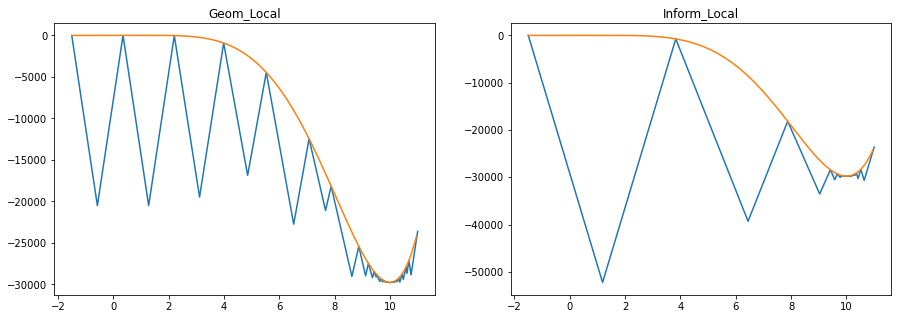

Функция№ 2
Настоящий минимум: 5.1499999999999915, -1.8994908045690733 

   ~ Geom_Local ~
Количество шагов: 66
Найденный минимум: 5.145630813203175, -1.8995992840413507
   ~ Inform_Local ~
Количество шагов: 35
Найденный минимум: 5.1456263904045425, -1.8995992784120728


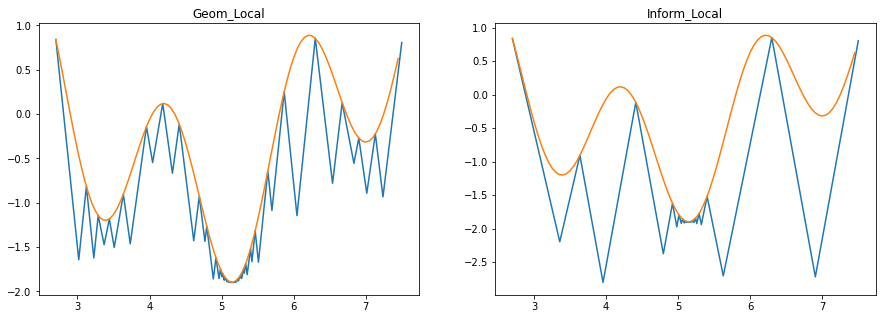

Функция№ 3
Настоящий минимум: 5.8000000000002245, -12.020848475826089 

   ~ Geom_Local ~
Количество шагов: 234
Найденный минимум: -0.4914549211796239, -12.031248805766642
   ~ Inform_Local ~
Количество шагов: 135
Найденный минимум: -6.77487999685052, -12.031235133992576


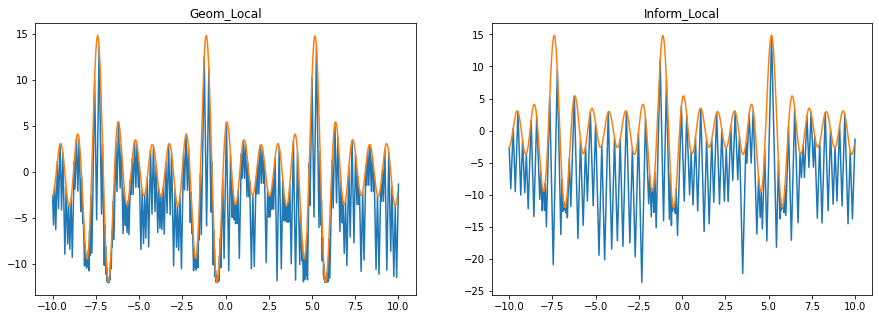

Функция№ 4
Настоящий минимум: 2.8500000000000005, -3.850117997429248 

   ~ Geom_Local ~
Количество шагов: 62
Найденный минимум: 2.8679562468584066, -3.850450702657986
   ~ Inform_Local ~
Количество шагов: 40
Найденный минимум: 2.8680495190922475, -3.850450708555108


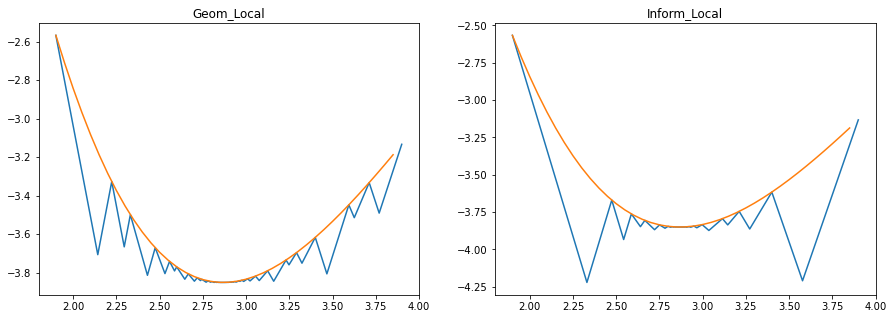

Функция№ 5
Настоящий минимум: 0.9500000000000001, -1.4268942573683832 

   ~ Geom_Local ~
Количество шагов: 71
Найденный минимум: 0.9660656846490482, -1.4890724386303253
   ~ Inform_Local ~
Количество шагов: 44
Найденный минимум: 0.9660625343004888, -1.4890724048421196


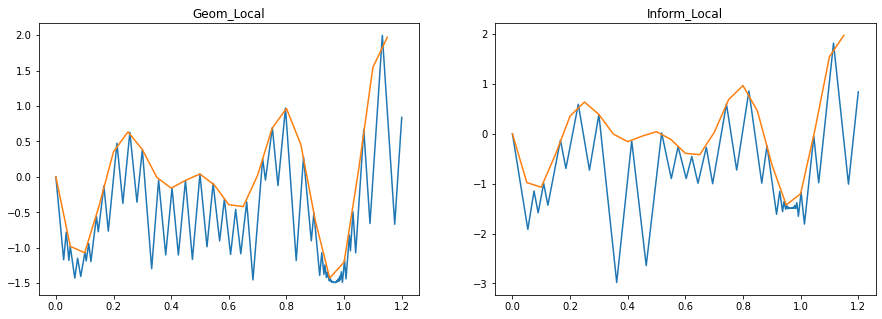

Функция№ 6
Настоящий минимум: 0.7000000000001521, -0.8235032347313309 

   ~ Geom_Local ~
Количество шагов: 99
Найденный минимум: 0.6797703158430767, -0.8242393329686273
   ~ Inform_Local ~
Количество шагов: 53
Найденный минимум: 0.6791011881045892, -0.8242389917657562


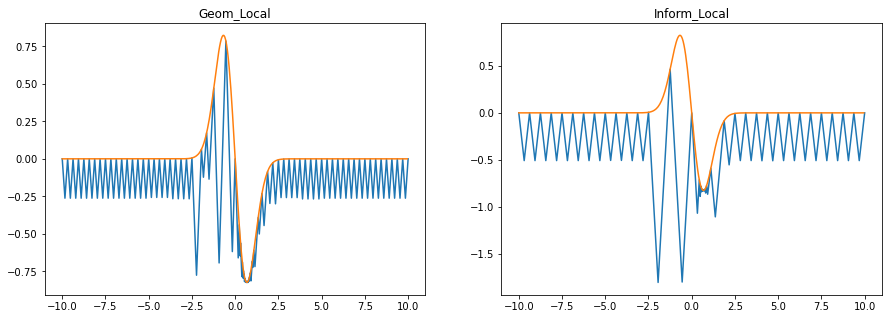

Функция№ 7
Настоящий минимум: 5.199999999999991, -1.6013072532171346 

   ~ Geom_Local ~
Количество шагов: 65
Найденный минимум: 5.19987131538861, -1.6013074949151394
   ~ Inform_Local ~
Количество шагов: 38
Найденный минимум: 5.199606495295667, -1.6013073701074552


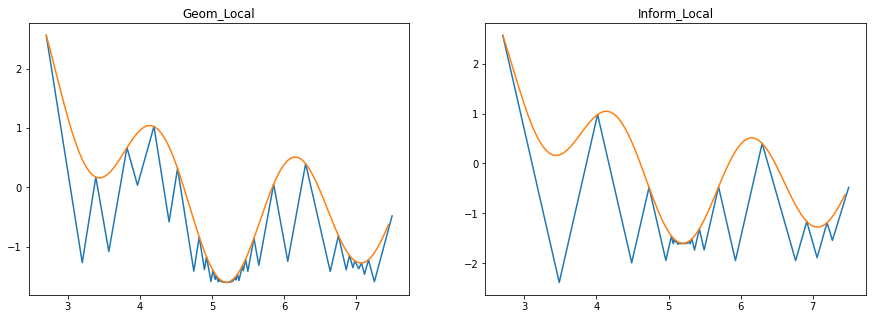

Функция№ 8
Настоящий минимум: -0.7999999999998693, -14.507990225645369 

   ~ Geom_Local ~
Количество шагов: 219
Найденный минимум: -0.800371644825566, -14.508007488565426
   ~ Inform_Local ~
Количество шагов: 131
Найденный минимум: 5.482699762429726, -14.508003284210341


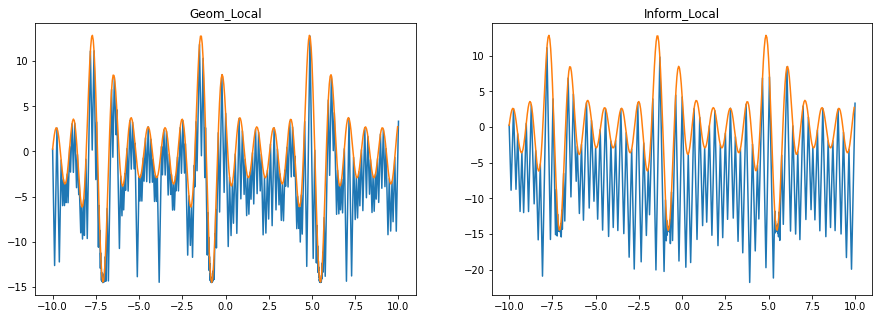

Функция№ 9
Настоящий минимум: 17.04999999999995, -1.9058801986815839 

   ~ Geom_Local ~
Количество шагов: 68
Найденный минимум: 17.039162860348448, -1.9059611178127889
   ~ Inform_Local ~
Количество шагов: 41
Найденный минимум: 17.03914074243479, -1.9059611163666879


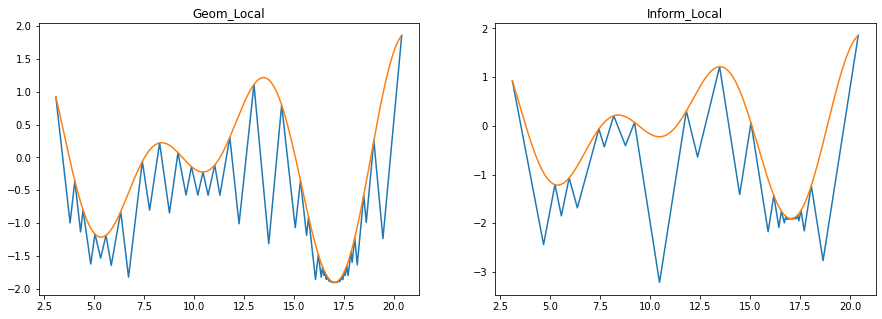

Функция№ 10
Настоящий минимум: 8.0, -7.914865972987054 

   ~ Geom_Local ~
Количество шагов: 66
Найденный минимум: 7.978673378122622, -7.916727371347868
   ~ Inform_Local ~
Количество шагов: 39
Найденный минимум: 7.978869197015677, -7.916727202535754


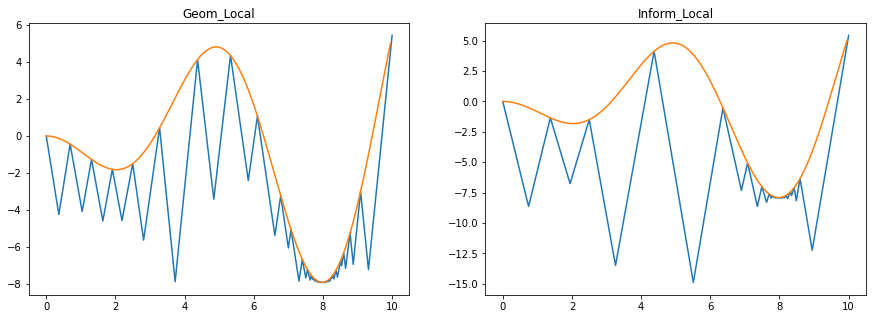

In [17]:
modes = ['Geom_Local', 'Inform_Local']
interations = np.zeros((len(func), len(modes)))
# real_mins = []
for i in range(len(func)):
    plt.figure(figsize=(15, 5))
    x = np.arange(*omega[i], 0.05)
    y = func[i](x)
    x_real, y_real = x[np.argmin(y)], min(y)
    # real_mins.append((x_real, y_real))
    print('Функция№', i+1)
    print(f'Настоящий минимум: {x_real}, {y_real}', '\n')
    for j, mode in enumerate(modes):
        ax = plt.subplot(1, len(modes), j+1)
        q, add_nodes, k = search_min(func[i], *omega[i], mode=mode)
        new_q = q + add_nodes    # нужно для построения ломанной
        new_q.sort(key=lambda x: x[0])
        new_q = np.array(new_q)
        q = np.array(q)
        plt.plot(new_q[:, 0], new_q[:, 1])
        plt.plot(x, y)
        plt.title(mode)
        # ax.set_xlim([9.5, 10.5])
        # ax.set_ylim([-29000, -30000])
        x_min, y_min = min(q, key=lambda x: x[1])    # минимумы надо брать из узлов на кривой
        print('   ~', mode,'~')
        print(f'Количество шагов: {k}')
        print(f'Найденный минимум: {x_min}, {y_min}')
        interations[i,j] = k
    plt.show()


Можно посмотреть на количество итераций в табличке. Очередность столбцов соответствует очередности методов на графиках. Если сравнить с таблицей в методичке, то получается что значения достаточно близки

In [18]:
interations.astype('int')

array([[ 59,  34],
       [ 66,  35],
       [234, 135],
       [ 62,  40],
       [ 71,  44],
       [ 99,  53],
       [ 65,  38],
       [219, 131],
       [ 68,  41],
       [ 66,  39]])

Если посмотреть на сходимость методов, то видно, что сильное несовпадение получается для сильно осциллирующих функций. В остальном вроде бы получается достаточно точно, хотя по ощущениям алгоритмы с глобальной настройкой были точнее

### Посмотрим на ломанные для первых пяти функций в окрестности глобальных минимумов, там должно быть хорошо видно, что углы наклона кусочков ломанной меняются

Функция№ 1
Настоящий минимум: 10.00000000000001, -29763.23333333336 

   ~ Geom_Local ~
Количество шагов: 59
Найденный минимум: 10.000256290309466, -29763.233024491772
   ~ Inform_Local ~
Количество шагов: 34
Найденный минимум: 10.00024140763308, -29763.233059320064


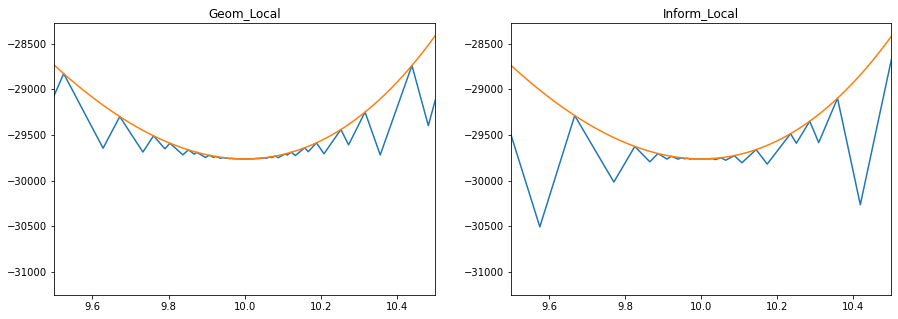

Функция№ 2
Настоящий минимум: 5.149999999999948, -1.8994908045690753 

   ~ Geom_Local ~
Количество шагов: 66
Найденный минимум: 5.145630813203175, -1.8995992840413507
   ~ Inform_Local ~
Количество шагов: 35
Найденный минимум: 5.1456263904045425, -1.8995992784120728


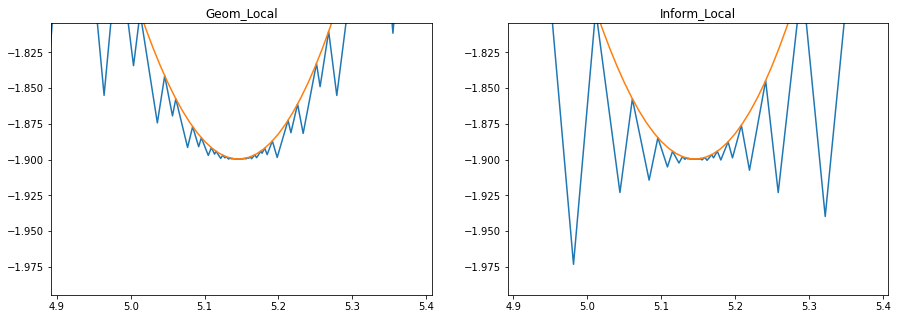

Функция№ 3
Настоящий минимум: -0.4900000000002027, -12.030949841670427 

   ~ Geom_Local ~
Количество шагов: 234
Найденный минимум: -0.4914549211796239, -12.031248805766642
   ~ Inform_Local ~
Количество шагов: 135
Найденный минимум: -6.77487999685052, -12.031235133992576


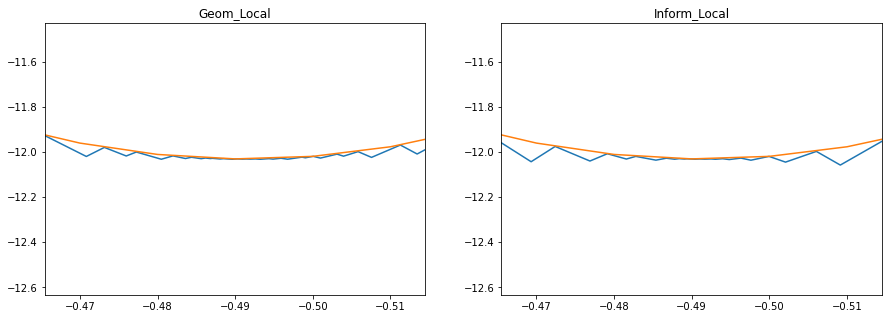

Функция№ 4
Настоящий минимум: 2.870000000000001, -3.8504467836080356 

   ~ Geom_Local ~
Количество шагов: 62
Найденный минимум: 2.8679562468584066, -3.850450702657986
   ~ Inform_Local ~
Количество шагов: 40
Найденный минимум: 2.8680495190922475, -3.850450708555108


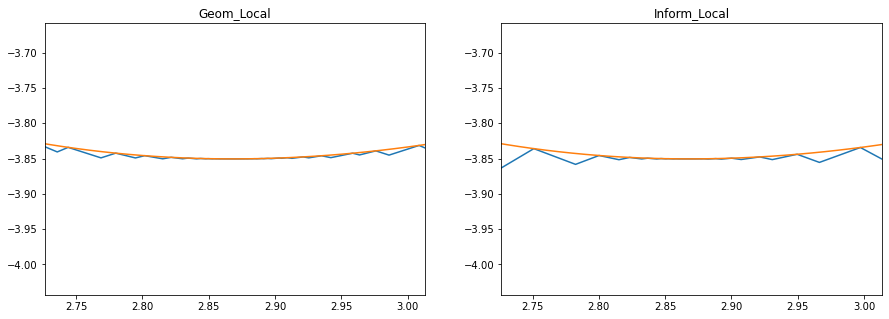

Функция№ 5
Настоящий минимум: 0.97, -1.4852675087891367 

   ~ Geom_Local ~
Количество шагов: 71
Найденный минимум: 0.9660656846490482, -1.4890724386303253
   ~ Inform_Local ~
Количество шагов: 44
Найденный минимум: 0.9660625343004888, -1.4890724048421196


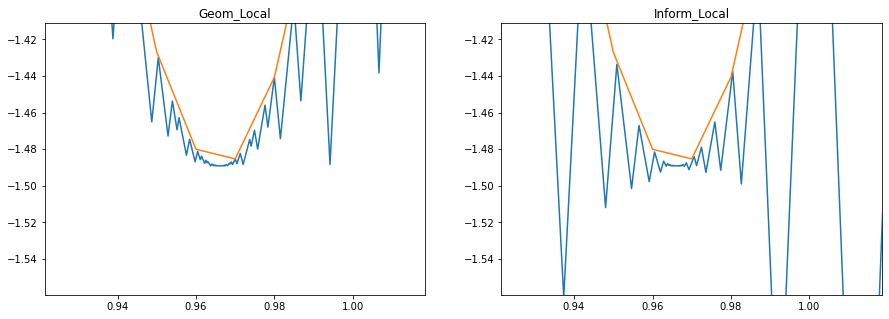

In [28]:
modes = ['Geom_Local', 'Inform_Local']
interations = np.zeros((len(func), len(modes)))
for i in range(5):
    plt.figure(figsize=(15, 5))
    x = np.arange(*omega[i], 0.01)
    y = func[i](x)
    x_real, y_real = x[np.argmin(y)], min(y)
    print('Функция№', i+1)
    print(f'Настоящий минимум: {x_real}, {y_real}', '\n')
    for j, mode in enumerate(modes):
        ax = plt.subplot(1, len(modes), j+1)
        q, add_nodes, k = search_min(func[i], *omega[i], mode=mode)
        new_q = q + add_nodes    # нужно для построения ломанной
        new_q.sort(key=lambda x: x[0])
        new_q = np.array(new_q)
        q = np.array(q)
        plt.plot(new_q[:, 0], new_q[:, 1])
        plt.plot(x, y)
        plt.title(mode)

        ax.set_xlim([0.95 * x_real, 1.05 * x_real])
        ax.set_ylim([1.05 * y_real, 0.95 * y_real])

        x_min, y_min = min(q, key=lambda x: x[1])    # минимумы надо брать из узлов на кривой
        print('   ~', mode,'~')
        print(f'Количество шагов: {k}')
        print(f'Найденный минимум: {x_min}, {y_min}')
        interations[i,j] = k
    plt.show()